In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/miniprojectfin.csv')
data.head(5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,L
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,M
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,M
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,M
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,L


In [36]:
data.isnull().sum()

Product_Id                     0
Product_Weight                 0
Product_Sugar_Content          0
Product_Allocated_Area       188
Product_Type                   0
Product_MRP                    0
Store_Id                       0
Store_Establishment_Year       0
Store_Size                     0
Store_Location_City_Type       0
Store_Type                     0
Product_Store_Sales_Total      0
dtype: int64

In [37]:
data['Product_Allocated_Area']=data['Product_Allocated_Area'].ffill()

In [38]:
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Product_Id'] = le.fit_transform(data['Product_Id'])
data['Product_Sugar_Content'] = le.fit_transform(data['Product_Sugar_Content'])
data['Product_Type'] = le.fit_transform(data['Product_Type'])
data['Store_Id'] = le.fit_transform(data['Store_Id'])
data['Store_Size'] = le.fit_transform(data['Store_Size'])
data['Store_Location_City_Type'] = le.fit_transform(data['Store_Location_City_Type'])
data['Store_Type'] = le.fit_transform(data['Store_Type'])
data['Product_Store_Sales_Total'] = le.fit_transform(data['Product_Store_Sales_Total'])

In [40]:
pip install xgboost


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
X = data.iloc[:,0:11]
y = data['Product_Store_Sales_Total']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [44]:
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Additional: Display a classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9726183685111238
Confusion Matrix:
[[ 130    1    7]
 [   0  531   24]
 [   4   12 1044]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       138
           1       0.98      0.96      0.97       555
           2       0.97      0.98      0.98      1060

    accuracy                           0.97      1753
   macro avg       0.97      0.96      0.97      1753
weighted avg       0.97      0.97      0.97      1753



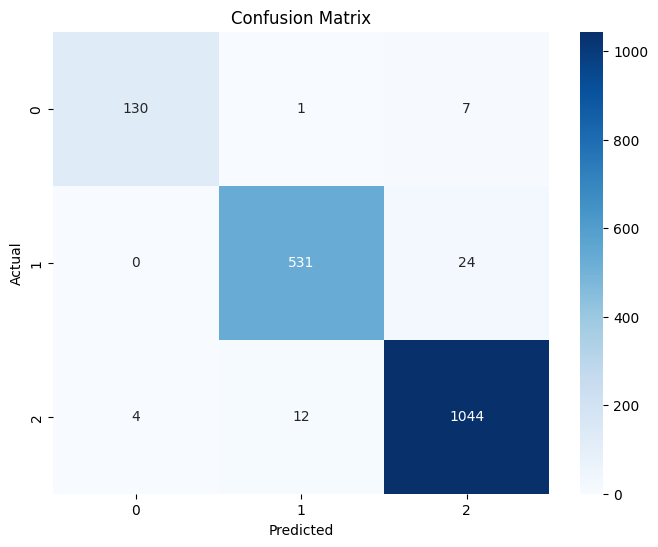

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()